# **Data Analysis Project: [Bike Sharing](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download)**

*   Name: Alifya Zhafira Ananda
*   Email: alifya.zhafira29@gmail.com



## Making Business Questions for Data Analysis

**Spesific**
1. How many bike rentals are used on Monday in September 2011 during the fall season?

**Measureable**
2. How many bike rentals were used on holidays during the winter season in 2012?

**Action-oriented**
3. How to increase the number of rental bicycles used by regular users on weekdays, with seasonality as the most influential variable?

**Relevant**
4. What is the relationship or correlation between temperature (temp) and the number of registered users?

**Time-bound**
5. How did the bike lending service perform for this quarter compared to the previous quarter or the previous year? How to improve performance for the next quarter?

## 1. Import Necessary Libraries

In [289]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm, probplot
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Data Wrangling

### Gathering Data

In [290]:
#Load the datasets
raw_df_day = pd.read_csv("/content/drive/MyDrive/dataset/day.csv")
raw_df_hour = pd.read_csv("/content/drive/MyDrive/dataset/hour.csv")

In [291]:
# Display the first 5 rows of the dataframe
raw_df_day.head().style.background_gradient(cmap='Greys')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [292]:
# Display the first 5 rows of the dataframe
raw_df_hour.head().style.background_gradient(cmap='Greys')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


## 3. Assessing Data

### Data Type

In [293]:
print('Dataframe day:')
print(raw_df_day.info())

print('\nDataframe hour:')
print(raw_df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

On both datasets, there is an issue with the data type in the dteday column, which initially should be of **datetime** type but is currently an **object**.

### Missing Value

In [294]:
print('Dataframe day:')
print(raw_df_day.isna().sum())

print('\nDataframe hour:')
print(raw_df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There's no missing value in both datasets.

#### Duplicate Data

In [295]:
print('day:', raw_df_day.duplicated().sum())
print("hour:", raw_df_hour.duplicated().sum())

day: 0
hour: 0


There's no duplicated data in both datasets.

### Descriptive Statistics

In [296]:
raw_df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.50,6.52,0.03,3.00,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.50,3.45,0.17,2.00,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.00,4.00,0.00,1.00,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.00,7.00,0.00,3.00,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.00,10.00,0.00,5.00,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [297]:
raw_df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.50,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.50,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.00,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.00,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.00,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.00,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


### Descriptive Analysis

**Day Dataset**

* Data Range: The data spans over a period of 2 years with a total of 731 entries.
* The most common season is season 2 (summer) with approximately 33.44% of the total entries, followed by season 3 (autumn) with around 25.86% of the total entries.
* The dominant year in the data is 2012, accounting for about 50.07% of the total entries.
* The month with the highest bike rentals is July, constituting approximately 10.38% of the total entries, while the month with the lowest bike rentals is January, contributing only about 7.79% of the total entries.
* Holidays occur only about 2.87% of the total days in the data.
* Approximately 68.40% of the days in the data are weekdays.
* The average weather condition is good (weathersit = 1), indicating suitable conditions for biking.
* The average temperature is around 0.50 (41°C), with the average perceived temperature about 0.47 (50°C), suggesting that the perceived temperature is higher than the actual temperature on average.
* The average humidity is about 0.47 (47%), indicating a relatively high level of humidity.
* The average wind speed is about 0.63 (67% of maximum), suggesting that the wind speed tends to be moderate.
* The average number of casual users is around 848, while the average number of registered users is about 3656. This suggests that registered users are more dominant in bike rental usage.
* The average total rentals amount to about 4504 per day, with significant fluctuations from day to day.

**Hour Dataset**

* The dataset consists of 17,379 entries.
* The average season is around 2.50, indicating an average season.
Year: The average year is around 0.50, indicating the comparison between 2011 and 2012.
* The average month is around 6.54, indicating the average month in a year.
* The average hour is around 11.55, indicating the average hour in a day.
Holiday: The percentage of holidays is around 0.03.
* The average weekday is around 3.00.
Workingday: The percentage of working days is around 0.68.
* The average weather situation is around 1.43.
* The average temperature is around 0.50, indicating normal average temperature.
* The average feeling temperature is around 0.48, approaching the actual temperature.
* The average humidity is around 0.48.
Windspeed: The average windspeed is around 0.63.
* The average number of casual users is around 35.68.
* The average number of registered users is around 153.79.
* The average total bike rentals is around 189.46.

## 4. Cleaning Data

In [298]:
# Create a copy of the original DataFrame to preserve the integrity of the raw data.
df_day = raw_df_day.copy()
df_hour = raw_df_hour.copy()

# Convert the 'dteday' column to datetime format using the pd.to_datetime() function.
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_day['dteday'])

# Display information about the 'dteday' column after converting it to datetime format.
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


In [299]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


## 5. Exploratory Data Analysis (EDA)

### Distribution of continuous and categorical variables

#### Continuos Variables Distribution

From the following visualization, it can be seen that almost all variables have a normal distribution, except for the casual variable which has a right skewed distribution, which means that each day the average casual user is only a few.

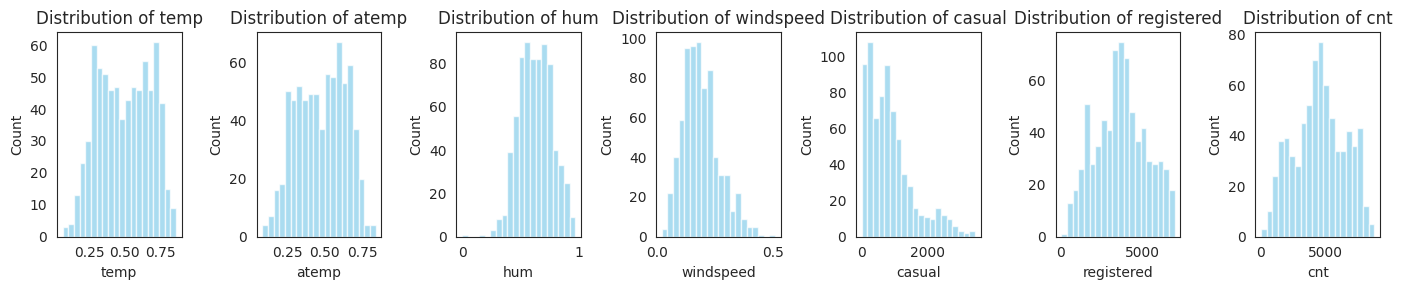

In [300]:
columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Set up the plot size and layout of subplots
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(14, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop through each column and create a histogram plot
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df_day[column], bins=20, color='skyblue', alpha=0.7)
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Display all plots in one output
plt.tight_layout()
plt.show()

#### Categorical Variables Distribution

From the output, it can be seen that almost all variables have an imbalance class distribution, except for the season variable which has a balanced class distribution because the length of the season will not change every year.

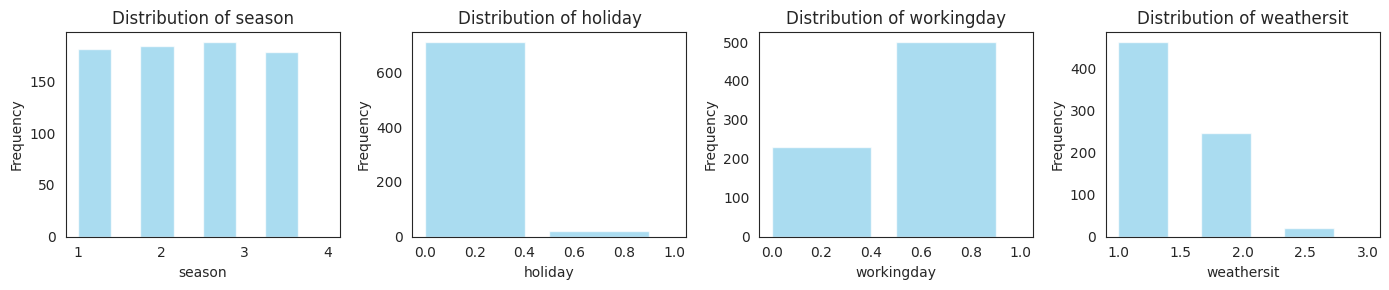

In [301]:
# Define the columns to plot
columns_to_plot = ['season', 'holiday', 'workingday', 'weathersit']

# Set up the plot size and layout of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop through each column and create a histogram plot with narrower bars
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df_day[column], bins=len(df_day[column].unique()), color='skyblue', alpha=0.7, width=0.4)
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Display all plots in one output
plt.tight_layout()
plt.show()

### Average comparison of regular and registered users

From the output, it can be assumed that bicycle borrowers for each day are more registered users than casual borrowers.

In [302]:
# Calculate the mean for 'casual' and 'registered' variables
overall_avg_casual = np.mean(df_day['casual'])
overall_avg_registered = np.mean(df_day['registered'])

# Create a DataFrame for the mean results
data = {'Variable': ['Casual', 'Registered'],
        'Mean': [overall_avg_casual, overall_avg_registered]}
pivot_table_overall = pd.DataFrame(data)

# Display the pivot table
print("Pivot Table for the average number of bike rentals from casual and registered users:")
print(pivot_table_overall.to_string(index=False))

Pivot Table for the average number of bike rentals from casual and registered users:
  Variable    Mean
    Casual  848.18
Registered 3656.17


### The effect of certain days on the number of bicycle rental loans

From the output, it can be assumed that bicycle loans will be high on weekdays and not weeekends or holidays.

In [303]:
# Performing mapping for each categorical variable
df_day['holiday'] = df_day['holiday'].map({0: 'No', 1: 'Yes'})
df_day['weekday'] = df_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_day['workingday'] = df_day['workingday'].map({0: 'No', 1: 'Yes'})

# Creating pivot tables for the average number of bike rentals against categorical day variables
pivot_holiday = df_day.groupby(by=["holiday"]).agg({"cnt": "mean"}).reset_index()
pivot_weekday = df_day.groupby(by=["weekday"]).agg({"cnt": "mean"}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
pivot_workingday = df_day.groupby(by=["workingday"]).agg({"cnt": "mean"}).reset_index()


In [304]:
print("Average bike rentals against holiday status:")
print(pivot_holiday.to_string(index=False))

Average bike rentals against holiday status:
holiday     cnt
     No 4527.10
    Yes 3735.00


In [305]:
print("Average bike rentals against weekday:")
print(pivot_weekday.to_string(index=False))

Average bike rentals against weekday:
  weekday     cnt
   Monday 4338.12
  Tuesday 4510.66
Wednesday 4548.54
 Thursday 4667.26
   Friday 4690.29
 Saturday 4550.54
   Sunday 4228.83


In [306]:
print("Average bike rentals against working day:")
print(pivot_workingday.to_string(index=False))

Average bike rentals against working day:
workingday     cnt
        No 4330.17
       Yes 4584.82


### Relationship between seasons and the number of bicycle rental loans

From the output, it can be assumed that bicycle borrowing will be high on days with good weather and not in spring.

In [307]:
# Performing mapping for each categorical variable
df_day['weathersit'] = df_day['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})
df_day['season'] = df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Setting the order of categories
weathersit_order = ['Clear', 'Misty', 'Light Rain', 'Heavy Rain']
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

In [308]:
# Creating pivot tables for the average number of bike rentals against weather and season variables
pivot_weathersit = df_day.groupby(by=["weathersit"]).agg({"cnt": "mean"}).reindex(weathersit_order, fill_value=0).reset_index()
pivot_season = df_day.groupby(by=["season"]).agg({"cnt": "mean"}).reindex(season_order, fill_value=0).reset_index()

In [309]:
print("Average bike rentals against weather conditions:")
print(pivot_weathersit.to_string(index=False))

Average bike rentals against weather conditions:
weathersit     cnt
     Clear 4876.79
     Misty 4035.86
Light Rain 1803.29
Heavy Rain    0.00


In [310]:
print("Average bike rentals against season:")
print(pivot_season.to_string(index=False))

Average bike rentals against season:
season     cnt
Spring 2604.13
Summer 4992.33
  Fall 5644.30
Winter 4728.16


### Correlation between numerical variables

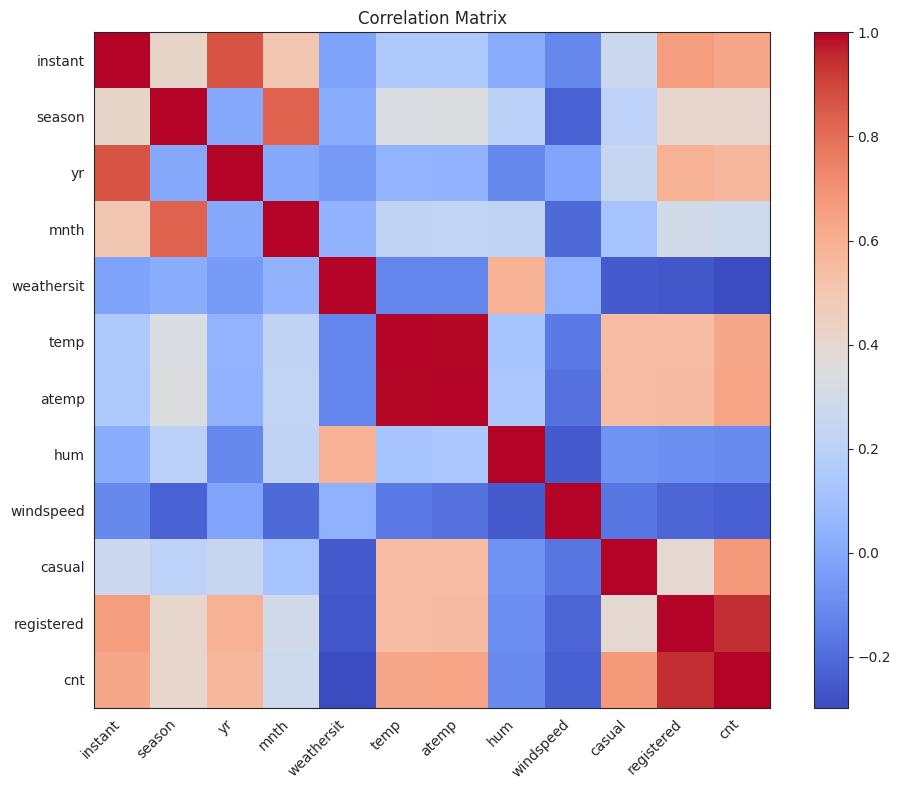

In [311]:
# Calculate correlation matrix
corr = df.corr()

# Set up plot size
plt.figure(figsize=(10, 8))

# Plot correlation matrix
heatmap = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap)

# Set labels and ticks
plt.title('Correlation Matrix')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


## 6. Explanatory Analysis

### Spesific

1. How many bike rentals are used on Monday in September 2011 during the fall season?

In [321]:
# Filter the dataframe based on the specified conditions
filtered_df_day = df_day[(df_day['yr'] == 0) & (df_day['mnth'] == 9) & (df_day['weekday'] == "Monday") & (df_day['season'] == "Fall")]

# Calculate the total bike rentals
total_rentals = filtered_df_day['cnt'].sum()

# Display the result
print("Total bike rentals on Mondays in September 2011 during the fall:", total_rentals)

Total bike rentals on Mondays in September 2011 during the fall: 12603


### Measurable

2. How many bike rentals were used on holidays during the winter season in 2012?

In [320]:
# Filter the dataframe based on the specified conditions
filtered_df_day = df_day[(df_day['yr'] == 1) & (df_day['season'] == 'Winter') & (df_day['holiday'] == 'Yes')]

# Calculate the total number of bike rentals
total_rentals = filtered_df_day['cnt'].sum()

# Display the result
print("Total bike rentals on holidays during the winter season in 2012:", total_rentals)

Total bike rentals on holidays during the winter season in 2012: 14172


### Action-oriented

3. How to increase the number of rental bicycles used by regular users on weekdays, with seasonality as the most influential variable?

Based on the observation that "Summer" is the top factor affecting casual bike rentals on working days, followed by "Winter" and "Fall," we can draw several conclusions to increase the number of bike rentals used by casual users on working days:

1. **Promote Summer Events**: Organize special events or promotions during the summer season to attract more casual users to rent bikes on working days.
2. **Offer Winter and Fall Promotions**: Provide discounts or offers tailored to winter and fall seasons to encourage casual users to rent bikes during these times.
3. **Improve Riding Conditions**: Enhance bike infrastructure and urban planning to create safer and more enjoyable riding experiences for casual users throughout all seasons.
4. **Targeted Marketing**: Use targeted marketing campaigns to highlight the benefits of bike rentals on working days, emphasizing convenience, health benefits, and environmental sustainability.

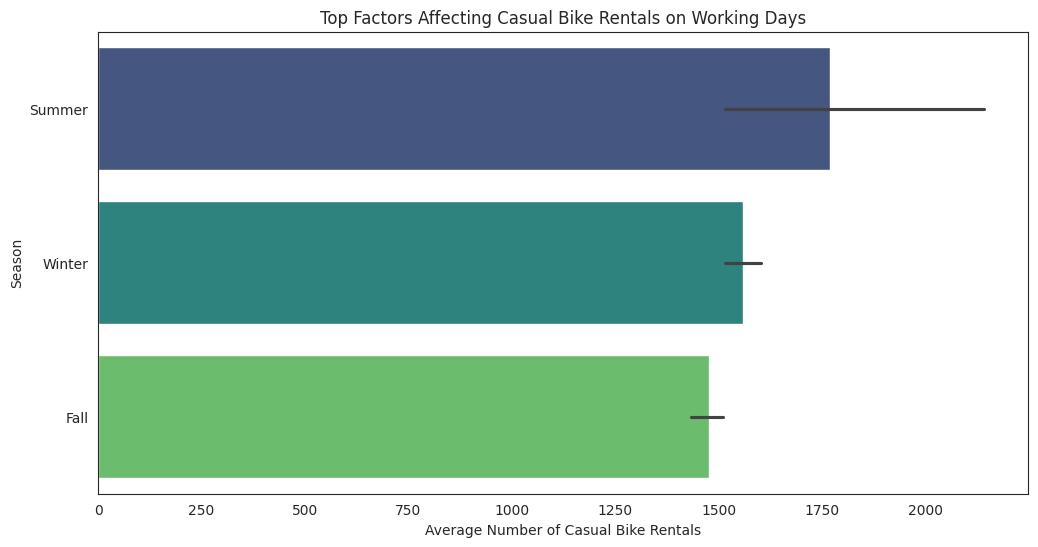

In [314]:
# Filter the dataframe to select data for working days
working_days_data = df_day[df_day['workingday'] == "Yes"]

# Group the data by various factors and calculate the average number of casual bike rentals
casual_rentals_by_factors = working_days_data.groupby(['season', 'weathersit', 'temp', 'hum', 'windspeed'])['casual'].mean().reset_index()

# Sort the data by the average number of casual bike rentals in descending order
casual_rentals_by_factors = casual_rentals_by_factors.sort_values(by='casual', ascending=False)

# Visualize the factors affecting casual bike rentals on working days
plt.figure(figsize=(12, 6))
sns.barplot(data=casual_rentals_by_factors.head(10), x='casual', y='season', orient='h', palette='viridis')
plt.title('Top Factors Affecting Casual Bike Rentals on Working Days')
plt.xlabel('Average Number of Casual Bike Rentals')
plt.ylabel('Season')
plt.show()

### Relevant

4. What is the relationship or correlation between temperature (temp) and the number of registered users?

The plot shows a positive correlation indicating that increasing temperature (temp) also increases the number of registered users.

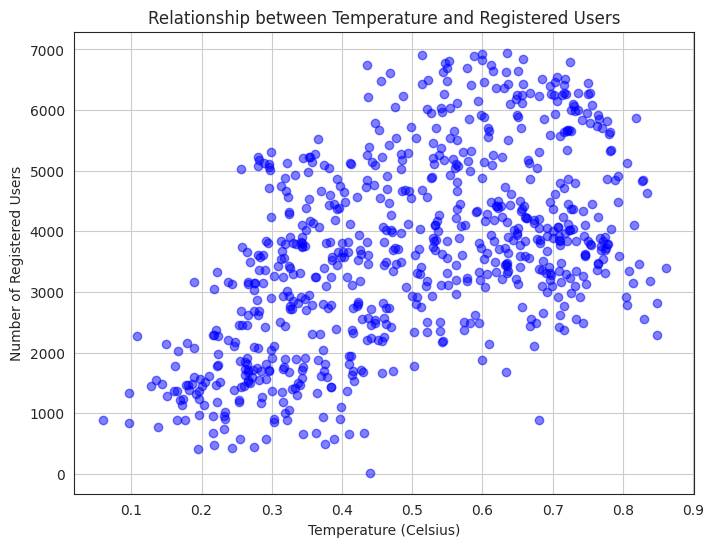

In [315]:
# Plotting the relationship between temperature and registered users
plt.figure(figsize=(8, 6))
plt.scatter(df_day['temp'], df_day['registered'], color='blue', alpha=0.5)
plt.title('Relationship between Temperature and Registered Users')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Registered Users')
plt.grid(True)
plt.show()

### Time-bound

5. How did the bike lending service perform for this quarter compared to the previous quarter or the previous year? How to improve performance for the next quarter?

The total number of bike rentals for the current quarter is lower than the total for the previous quarter. This indicates a decrease in bike rental activity during this quarter compared to the previous quarter.

Strategies to improve performance for the next quarter:

1. **Marketing**: Increase targeted ads, social media, and local partnerships.
2. **Services**: Offer discounts, loyalty programs, and new bike options.
3. **Infrastructure**: Expand network, enhance lanes, and upgrade tech.
4. **Feedback**: Gather insights, address concerns, and tailor services.
5. **Partnerships**: Collaborate with local businesses and events for visibility.

In [317]:
# Group the data by quarter and calculate the total number of bike rentals (cnt) for each quarter
df_day['quarter'] = df_day['dteday'].dt.quarter
quarterly_rentals = df_day.groupby('quarter')['cnt'].sum()

# Compare the total number of bike rentals for this quarter with the previous quarter or the previous year
current_quarter_rentals = quarterly_rentals.iloc[-1]
previous_quarter_rentals = quarterly_rentals.iloc[-2]

# Print the comparison results
print("Total bike rentals for the current quarter:", current_quarter_rentals)
print("Total bike rentals for the previous quarter:", previous_quarter_rentals)

# Analyze trends and factors influencing performance and suggest improvements for the next quarter
# Suggestions for improvement could include increasing marketing efforts, expanding bike-sharing infrastructure, improving user experience, offering promotions or discounts, and enhancing customer support services.

Total bike rentals for the current quarter: 788219
Total bike rentals for the previous quarter: 1042133


## 7. Conclusions

* Bike rentals on Mondays in September 2011 during fall totaled 12,603, indicating moderate demand for rentals during that time.
* Bike rentals on holidays during the winter season in 2012 reached 14,172, suggesting notable usage during holiday periods and colder weather.
* To increase rental bicycles used by regular users on weekdays, focus on seasonal factors:
  * Leverage Summer Events: Promote special events or discounts during the summer season to boost rentals.
  * Offer Tailored Promotions: Provide targeted offers aligned with winter and fall seasons to encourage more rentals.
  * Enhance Riding Conditions: Improve infrastructure to enhance biking experiences throughout all seasons.
  * Targeted Marketing: Use targeted marketing campaigns to emphasize weekday rentals, highlighting convenience and health benefits.
* The relationship between temperature and registered users indicates a positive correlation, suggesting higher temperatures correspond to increased registered users' usage.
* Total bike rentals for the current quarter (788,219) were lower than the previous quarter (1,042,133), signaling a decrease in rental activity. Strategies to improve performance include marketing efforts, service enhancements, infrastructure investments, feedback gathering, and partnerships.